In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [119]:
os.chdir(r'C:\Users\Vivek\PGA32')

In [120]:
df = pd.read_parquet('yellow_tripdata_2023_02.parquet')

In [121]:
# here target variable is fare_amount

In [122]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [123]:
df1 = df.drop(columns=['extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','total_amount'])
df1.head(2) ## remove all the unnecessary columns

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.3,1.0,N,142,163,2,4.4
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.0,1.0,N,71,71,4,-3.0


In [124]:
## FEature engineering (creating new variables)

In [125]:
df1['VendorID'].value_counts()# this is actualy a categorical column because their numerical values 1 and 2 not realising that whateever is high and low
# we will make this variable dummy

2    2124917
1     787837
6       1201
Name: VendorID, dtype: int64

In [126]:
df1['passenger_count'].value_counts()

1.0    2162692
2.0     414537
3.0      97699
4.0      48147
0.0      47277
5.0      39984
6.0      26788
9.0          6
8.0          5
7.0          3
Name: passenger_count, dtype: int64

In [127]:
df1 = df1[df1['passenger_count']<=6] # remove 9,8,7 because they are outliers


In [129]:
df1['passenger_count'].value_counts()

1.0    2162692
2.0     414537
3.0      97699
4.0      48147
0.0      47277
5.0      39984
6.0      26788
Name: passenger_count, dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837124 entries, 0 to 2837137
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
dtypes: datetime64[ns](2), float64(4), int32(3), int64(1), object(1)
memory usage: 227.3+ MB


In [130]:
df1['trip_distance'].value_counts()

1.00     40658
0.90     40524
1.10     39710
0.80     39473
1.20     38710
         ...  
33.35        1
52.37        1
37.87        1
37.02        1
51.45        1
Name: trip_distance, Length: 4251, dtype: int64

In [16]:
df1['trip_distance'].describe(percentiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.999]).apply(lambda x : format(x,"f"))

# apply use to remove scientific notification

count    2837124.000000
mean           3.345950
std           24.953586
min            0.000000
10%            0.680000
20%            0.920000
30%            1.180000
40%            1.440000
50%            1.760000
60%            2.170000
70%            2.780000
80%            3.940000
90%            8.400000
95%           13.440000
96%           16.480000
97%           17.600000
98%           18.420000
99%           19.900000
99.9%         28.660000
max        17456.830000
Name: trip_distance, dtype: object

In [132]:
df1[df1['trip_distance']<=29].shape

(2834505, 11)

In [17]:
df1 = df1[df1['trip_distance']<=29] # 99.9% travel 28.66 mile rest 0.1 %  are act as outlier so we will remove them

In [18]:
df1.shape

(2834505, 11)

In [133]:
df1['RatecodeID'].value_counts()

1.0     2698684
2.0       99195
5.0       13109
99.0      13037
3.0        8764
4.0        4328
6.0           7
Name: RatecodeID, dtype: int64

In [134]:
df1['store_and_fwd_flag'].value_counts()

N    2820553
Y      16571
Name: store_and_fwd_flag, dtype: int64

In [135]:
df1['PULocationID'].value_counts()

161    133506
237    132725
132    131865
236    123099
186    103633
        ...  
221         1
105         1
187         1
251         1
176         1
Name: PULocationID, Length: 258, dtype: int64

In [136]:
df1['DOLocationID'].value_counts()

236    129654
237    118408
161    107660
170     83945
230     82812
        ...  
204        14
187        13
99          6
105         3
2           2
Name: DOLocationID, Length: 261, dtype: int64

In [137]:
# we have to create new column from PULocaitionID and DOlocationid column that is_pick_drop_same because we can conclude one this from t
#these two columns that they pick and drop in same location id

In [138]:
df1['is_pick_drop_same'] = np.where(df1['PULocationID'] == df1['DOLocationID'],1,0)

In [139]:
df1['is_pick_drop_same'].value_counts()

0    2683056
1     154068
Name: is_pick_drop_same, dtype: int64

In [140]:
df1.drop(columns=['PULocationID','DOLocationID'],inplace=True)

In [141]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,2,4.4,0
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,-3.0,1
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,3.0,1
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,1,70.9,0
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,1,17.0,0


In [142]:
df1['payment_type'].value_counts() # categorical

1    2309577
2     477387
4      32060
3      18100
Name: payment_type, dtype: int64

In [143]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,2,4.4,0
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,-3.0,1
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,3.0,1
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,1,70.9,0
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,1,17.0,0


In [146]:
df1['fare_amount'].describe(percentiles=[0.1,0.2,0.3,0.5,0.94,0.95,0.96,0.97,0.98,0.99,0.999]).apply(lambda x: format(x,"f"))

count    2837124.000000
mean          18.172690
std           17.601986
min         -754.050000
10%            6.500000
20%            7.900000
30%            9.300000
50%           12.800000
94%           52.000000
95%           61.100000
96%           70.000000
97%           70.000000
98%           70.000000
99%           71.300000
99.9%        135.000000
max         2203.100000
Name: fare_amount, dtype: object

In [147]:
df1[df1['fare_amount']<=2.5].shape

(25996, 10)

In [148]:
df1[df1['fare_amount']>=100].shape

(6991, 10)

In [149]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,2,4.4,0
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,-3.0,1
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,3.0,1
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,1,70.9,0
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,1,17.0,0


In [150]:
df2 = df1[(df1['fare_amount']>=2.5) & (df1['fare_amount']<=100)]

In [151]:
df2.shape

(2804572, 10)

In [152]:
df1.shape

(2837124, 10)

In [153]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,2,4.4,0
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,3.0,1
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,1,70.9,0
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,1,17.0,0
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,1,21.9,0


1. time duration
2. peak hours
3. peak days
4. is weekend?
5. end of month
6. start of month
7. mid_of_month
8. start ,mid and end week
9. is holiday?
10. hour of pick time (morning , afternoon,evening,late night,early morning)
11. which quarter
12. which month

In [38]:
df2['tpep_pickup_datetime'].min()

Timestamp('2008-12-31 23:05:06')

In [39]:
df2['tpep_pickup_datetime'].max()

Timestamp('2023-03-07 13:01:28')

In [40]:
df2['tpep_dropoff_datetime'].min()

Timestamp('2008-12-31 23:31:24')

In [41]:
df2['tpep_dropoff_datetime'].max()

Timestamp('2023-03-07 13:11:17')

In [154]:
df2[df2['tpep_pickup_datetime'].dt.year < 2023] # dt here convert into date then we fetch year

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same
1312010,2,2009-01-01 00:05:14,2009-01-01 00:14:09,1.0,1.92,1.0,N,2,11.4,0
1387271,2,2008-12-31 23:43:40,2008-12-31 23:53:59,1.0,1.66,1.0,N,2,12.1,0
2638356,2,2008-12-31 23:05:06,2009-01-01 21:05:13,1.0,3.04,1.0,N,1,17.0,0
2661017,2,2008-12-31 23:11:10,2009-01-01 08:14:17,1.0,2.95,1.0,N,2,13.5,0
2725408,2,2008-12-31 23:06:21,2008-12-31 23:31:24,1.0,10.13,1.0,N,2,39.4,0


In [155]:
df2[df2['tpep_pickup_datetime'].dt.month == 3].shape

(42, 10)

In [156]:
df3 = df2[df2['tpep_pickup_datetime'].dt.month == 2]

In [157]:
df3.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,2,4.4,0
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,3.0,1
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,1,70.9,0
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,1,17.0,0
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,1,21.9,0


In [158]:
df3.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
payment_type                      int64
fare_amount                     float64
is_pick_drop_same                 int32
dtype: object

In [159]:
df4 = df3[df3['tpep_pickup_datetime'].dt.year == 2023]

In [160]:
df4['tpep_dropoff_datetime'].min()

Timestamp('2023-02-01 00:03:10')

In [161]:
import datetime

In [162]:
df4['tpep_pickup_datetime'] = pd.to_datetime(df4['tpep_pickup_datetime'],errors ='coerce')
df4['tpep_dropoff_datetime'] = pd.to_datetime(df4['tpep_dropoff_datetime'],errors='coerce')

In [163]:
df4["duration_min"]=(df4["tpep_dropoff_datetime"]-df4["tpep_pickup_datetime"]) / pd.Timedelta(minutes=1)
df4["duration_hours"]=(df4["tpep_dropoff_datetime"]-df4["tpep_pickup_datetime"]) / pd.Timedelta(hours=1)

In [164]:
df4["duration_min"].describe(percentiles=[0.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.97,.98,.99,.999]).apply(lambda x: format(x,"f"))

count    2804517.000000
mean          15.895122
std           43.232938
min          -43.616667
1%             1.216667
5%             3.383333
10%            4.566667
20%            6.383333
30%            8.066667
40%            9.800000
50%           11.700000
60%           13.933333
70%           16.750000
80%           20.800000
90%           28.150000
95%           36.700000
96%           39.733333
97%           43.683333
98%           49.083333
99%           57.716667
99.9%        210.487733
max         7053.616667
Name: duration_min, dtype: object

In [165]:
df4["duration_hours"].describe(percentiles=[0.01,0.05,0.1,0.2,0.3,0.4,0.95,0.96,0.97,0.98,0.99,0.999]).apply(lambda x: format(x,"f"))

count    2804517.000000
mean           0.264919
std            0.720549
min           -0.726944
1%             0.020278
5%             0.056389
10%            0.076111
20%            0.106389
30%            0.134444
40%            0.163333
50%            0.195000
95%            0.611667
96%            0.662222
97%            0.728056
98%            0.818056
99%            0.961944
99.9%          3.508129
max          117.560278
Name: duration_hours, dtype: object

In [166]:
df4[df4['duration_hours']>100].shape

(1, 12)

In [167]:
df4[df4['duration_hours']>20].shape

(2325, 12)

In [168]:
df4[df4['duration_hours']<=0].shape

(877, 12)

In [169]:
df5 =df4[(df4['duration_min']>0)]

In [171]:
df6 =df5[(df5['duration_min']<=500)]

In [172]:
df6.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same,duration_min,duration_hours
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,2,4.4,0,1.683333,0.028056
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,3.0,1,0.233333,0.003889
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,1,70.9,0,32.083333,0.534722
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,1,17.0,0,13.300000,0.221667
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,1,21.9,0,14.633333,0.243889


In [173]:
df6['pick_up_hour'] = df6['tpep_pickup_datetime'].dt.hour

C:\Users\Vivek\AppData\Local\Temp/ipykernel_7728/4176240041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['pick_up_hour'] = df6['tpep_pickup_datetime'].dt.hour


In [175]:
df6

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same,duration_min,duration_hours,pick_up_hour
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,2,4.4,0,1.683333,0.028056,0
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,3.0,1,0.233333,0.003889,0
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,1,70.9,0,32.083333,0.534722,0
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,1,17.0,0,13.300000,0.221667,0
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,1,21.9,0,14.633333,0.243889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837133,2,2023-02-28 23:47:42,2023-02-28 23:54:17,1.0,1.76,1.0,N,1,10.0,0,6.583333,0.109722,23
2837134,2,2023-02-28 23:10:57,2023-02-28 23:17:52,2.0,1.86,1.0,N,1,10.7,0,6.916667,0.115278,23
2837135,2,2023-02-28 23:09:54,2023-02-28 23:23:41,1.0,2.75,1.0,N,1,16.3,0,13.783333,0.229722,23
2837136,2,2023-02-28 23:50:17,2023-03-01 00:14:33,1.0,8.36,1.0,N,1,37.3,0,24.266667,0.404444,23


In [176]:
df6['pick_up_hour'].value_counts(normalize=True)

18    0.071804
17    0.068923
19    0.064006
16    0.063831
15    0.063170
14    0.061727
13    0.057108
20    0.055582
21    0.055408
12    0.054597
22    0.051177
11    0.050426
10    0.046823
9     0.043207
23    0.038688
8     0.037814
7     0.027354
0     0.026417
1     0.017565
6     0.013859
2     0.012132
3     0.007872
5     0.005430
4     0.005080
Name: pick_up_hour, dtype: float64

In [177]:
def time(x):
    if x >=4 and x<8:
        return 'early morning'
    elif x>=8 and x<12:
        return 'morning'
    elif x>=12 and x<16:
        return 'After noon'
    elif x>=16 and x<20:
        return 'peak hours'
    elif x>=20 and x<=23:
        return 'night'
    elif x>=0 and x<4:
        return 'late night'
    else:
        return 'Unknown'
        

In [178]:
df6['hour_category'] = df6['pick_up_hour'].apply(time)

C:\Users\Vivek\AppData\Local\Temp/ipykernel_7728/2099815286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['hour_category'] = df6['pick_up_hour'].apply(time)


In [179]:
df6.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same,duration_min,duration_hours,pick_up_hour,hour_category
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,2,4.4,0,1.683333,0.028056,0,late night
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,3.0,1,0.233333,0.003889,0,late night
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,1,70.9,0,32.083333,0.534722,0,late night
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,1,17.0,0,13.300000,0.221667,0,late night
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,1,21.9,0,14.633333,0.243889,0,late night


In [180]:
df6['hour_category'].value_counts()

peak hours       752255
After noon       662730
night            562600
morning          499340
late night       179228
early morning    144878
Name: hour_category, dtype: int64

In [181]:
df6['dayofweek'] = df6['tpep_pickup_datetime'].dt.dayofweek

C:\Users\Vivek\AppData\Local\Temp/ipykernel_7728/3882979099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['dayofweek'] = df6['tpep_pickup_datetime'].dt.dayofweek


In [182]:
df6['dayofweek'].value_counts()

3    439417
4    437675
2    421819
5    413650
1    400058
6    345267
0    343145
Name: dayofweek, dtype: int64

In [183]:
df6['isweekend'] = np.where(df6['dayofweek'].isin([5,6]),1,0)

C:\Users\Vivek\AppData\Local\Temp/ipykernel_7728/1600801645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['isweekend'] = np.where(df6['dayofweek'].isin([5,6]),1,0)


In [184]:
df6['isweekend'].value_counts()

0    2042114
1     758917
Name: isweekend, dtype: int64

In [185]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [186]:
df6.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,is_pick_drop_same,duration_min,duration_hours,pick_up_hour,hour_category,dayofweek,isweekend
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,2,4.4,0,1.683333,0.028056,0,late night,2,0
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,4,3.0,1,0.233333,0.003889,0,late night,2,0
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,1,70.9,0,32.083333,0.534722,0,late night,2,0
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,1,17.0,0,13.300000,0.221667,0,late night,2,0
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,1,21.9,0,14.633333,0.243889,0,late night,2,0


## Model assumption

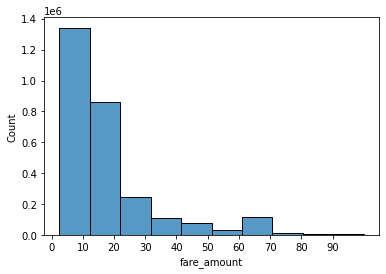

In [187]:
sns.histplot(df6["fare_amount"], bins=10)
plt.xticks(np.arange(0,100,10))
plt.show()

In [188]:
from scipy import stats

In [189]:
#stats.shapiro(df6['fare_amount']) #more than 5000 records  so not apply shapiro . here we apply jarque bera test

In [190]:
stats.jarque_bera(df6['fare_amount'])

Jarque_beraResult(statistic=5450961.160300129, pvalue=0.0)

In [191]:
stats.jarque_bera(np.log1p(df6["fare_amount"]))

Jarque_beraResult(statistic=282612.7127387432, pvalue=0.0)

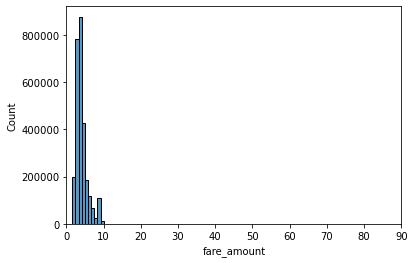

In [192]:
sns.histplot(np.sqrt(df6["fare_amount"]), bins=10)
plt.xticks(np.arange(0,100,10))
plt.show()

In [193]:
df7 = df6.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [194]:
df7.dtypes

VendorID                int32
passenger_count       float64
trip_distance         float64
RatecodeID            float64
store_and_fwd_flag     object
payment_type            int64
fare_amount           float64
is_pick_drop_same       int32
duration_min          float64
duration_hours        float64
pick_up_hour            int64
hour_category          object
dayofweek               int64
isweekend               int32
dtype: object

In [195]:
df8 = pd.get_dummies(df7,columns=['store_and_fwd_flag','hour_category'],drop_first=True)

### Model development

In [196]:
y =df8['fare_amount']
x= df8.drop(columns=['fare_amount'])

In [197]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [198]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=88)

In [199]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [200]:
lr.coef_

array([ 1.30442858e+00,  8.07791136e-02,  3.05309826e-02, -6.93068018e-02,
        3.24793722e-01,  3.43588527e+00,  1.14093784e+00,  1.90156306e-02,
       -1.45314378e-03, -2.67963762e-01,  1.96860524e+00,  4.94501606e-03,
        4.05157541e+00,  2.47309743e+00,  3.88577471e-01,  2.22616464e+00,
       -1.25376645e-01])

In [201]:
x.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'is_pick_drop_same', 'duration_min', 'duration_hours',
       'pick_up_hour', 'dayofweek', 'isweekend', 'store_and_fwd_flag_Y',
       'hour_category_early morning', 'hour_category_late night',
       'hour_category_morning', 'hour_category_night',
       'hour_category_peak hours'],
      dtype='object')

In [202]:
lr.intercept_

-2.008591210747948

In [203]:
for i,j in zip(x.columns,lr.coef_):
    print(i,"*",j)

VendorID * 1.3044285792294261
passenger_count * 0.0807791136115681
trip_distance * 0.03053098260394631
RatecodeID * -0.06930680181955745
payment_type * 0.3247937221870205
is_pick_drop_same * 3.435885269765559
duration_min * 1.140937838071093
duration_hours * 0.01901563063451562
pick_up_hour * -0.0014531437775282333
dayofweek * -0.2679637621466377
isweekend * 1.968605235641335
store_and_fwd_flag_Y * 0.0049450160560350264
hour_category_early morning * 4.051575411533532
hour_category_late night * 2.473097432165978
hour_category_morning * 0.388577471211771
hour_category_night * 2.2261646416888543
hour_category_peak hours * -0.125376644785382


## Model evaluation

In [204]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [205]:
pd.DataFrame({'Act':y_train,'Pred':pred_train}).head(2)

,Act,Pred
1442336,24.0,30.744879
45154,24.7,30.466126


In [206]:
#train

In [207]:
print('MSE',np.mean((pred_train-y_train)**2))
print('RMSE',np.sqrt(np.mean((pred_train-y_train)**2)))
print('MAE',np.mean(np.abs(pred_train-y_train)**2))
print('MApE',np.mean(np.abs((pred_train-y_train)/y_train)))

MSE 74.51034805938048
RMSE 8.63193767698658
MAE 74.51034805938048
MApE 0.21646079022833312


In [208]:
#test

In [209]:
print('MSE',np.mean((pred_test-y_test)**2))
print('RMSE',np.sqrt(np.mean((pred_test-y_test)**2)))
print('MAE',np.mean(np.abs(pred_test-y_test)**2))
print('MApE',np.mean(np.abs((pred_test-y_test)/y_test)))

MSE 73.3910325324547
RMSE 8.566856630786738
MAE 73.3910325324547
MApE 0.21630570455649356


In [210]:
# difference between train and test in almost same so it is ideal model

In [211]:
x.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'is_pick_drop_same', 'duration_min', 'duration_hours',
       'pick_up_hour', 'dayofweek', 'isweekend', 'store_and_fwd_flag_Y',
       'hour_category_early morning', 'hour_category_late night',
       'hour_category_morning', 'hour_category_night',
       'hour_category_peak hours'],
      dtype='object')

In [212]:
# let suppose new records enter

new_booking = pd.DataFrame({"VendorID":[2],'passenger_count':[2], 'trip_distance':[1.5], 'RatecodeID':[2],'payment_type':[1],
                            'is_pick_drop_same':[0],'duration_min':[15],'duration_hours':[15/60],'pick_up_hour':[6],
                            'day_of_week':[1],'isweekend':[0],'store_and_fwd_Y':[1],'hour_category_early_morning':[1], 
                            'hour_category_late_night':[0], 'hour_category_morning':[0], 'hour_category_night':[0],
                            'hour_category_peak_hours':[0]})

In [213]:
lr.predict(new_booking)

D:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- day_of_week
- hour_category_early_morning
- hour_category_late_night
- hour_category_peak_hours
- store_and_fwd_Y
Feature names seen at fit time, yet now missing:
- dayofweek
- hour_category_early morning
- hour_category_late night
- hour_category_peak hours
- store_and_fwd_flag_Y

  warnings.warn(message, FutureWarning)


array([21.89246005])

In [116]:
import pickle

In [117]:
pickle.dump(lr,open("linearRegression.pkl",'wb'))